# Exploratory Data Analysis Class

In [15]:
!pip install statsmodels

In [64]:
import pandas as pd
import yfinance as yf
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

In [82]:
class Stock_EDA:
    '''Stock Exploratory Data Analysis class for visualizing metrics
    and graphing various statistics. 
    
    Parameters
    ----------
    tickers: str or list of strings
        Tickers of the stocks to perform EDA on.
        
    start_date: str (yyyy-mm-dd)
        Start date of the stock history.
        
    end_date: str (yyyy-mm-dd)
        End date of the stock history.
        
    frequency: str, optional (default='1d')
        Frequency of the pulled stock data. 
        Valid frequencies: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        
    '''
    #
    def __init__(self, tickers, start_date, end_date, frequency='1d'):
        
        self.tickers = tickers
        self.start_date = start_date
        self.end_date = end_date
        self.frequency = frequency
        raw_data = yf.download(tickers, start=self.start_date, end=self.end_date, interval=self.frequency)
        self.data = raw_data.stack(1).reset_index().rename(columns = {'level_1':'Ticker'}).set_index('Date')
        
    def plot_adj_close(self, tickers='all'):
        
        """
        Plot the adjusted closing price time series for all of the
        stocks in the downloaded data or a subset of them.
        
        Parameters
        ----------
        tickers: string or list of strings
            The stocks to be plotted
            
        Returns
        -------
        plotly figure of the adjusted price of the time series. 
        
        """
        
        if tickers == 'all':
            fig = px.line(self.data, x = self.data.index, 
                          y = "Adj Close", 
                          title = "Historical Stock Price",
                         color = "Ticker")
            fig.show()
        else:
            fig = px.line(self.data[self.data['Ticker'].isin(tickers)], 
                         x = self.data[self.data['Ticker'].isin(tickers)].index,
                        y = "Adj Close",
                         title = "Historical Stock Price",
                         color = "Ticker")
            fig.update_layout(
                            xaxis_title="Time",
                            yaxis_title="Adj Close ($)"
            )
            fig.show()
            
    def plot_candlestick(self, ticker = None):
        
        if ticker is None:
            ticker = self.data['Tickers'].unique()[0]
        
        if isinstance(ticker, str) and self.data['Ticker'].str.contains(ticker).any():
            fig = go.Figure(data = [go.Candlestick(x = self.data[self.data['Ticker'] == ticker].index, 
                                       open = self.data[self.data['Ticker'] == ticker]['Open'],
                                      high = self.data[self.data['Ticker'] == ticker]['High'],
                                      low = self.data[self.data['Ticker'] == ticker]['Low'],
                                      close = self.data[self.data['Ticker'] == ticker]['Close'])])
            fig.update_layout(
                            title= ticker + " Historical Candlestick",
                            xaxis_title="Time",
                            yaxis_title="Price ($)"
            )
            fig.show()
        else:
            return print("Must provide existing single ticker as string")
        
    def plot_volume(self, ticker = None):
        
        if ticker is None:
            ticker = self.data['Tickers'].unique()[0]
        
        if isinstance(ticker, str) and self.data['Ticker'].str.contains(ticker).any():
            fig = px.bar(self.data, x= self.data[self.data['Ticker'] == ticker].index, 
                         y=self.data[self.data['Ticker'] == ticker]['Volume']
                       )
            fig.update_layout(
                            title= ticker + " Historical Volume",
                            xaxis_title="Time",
                            yaxis_title="Volume"
            )
            fig.show()
        else:
            return print("Must provide existing single ticker as string")
        
    def plot_daily_returns(self, tickers = 'all'):
        
        if tickers == 'all':
            fig = px.line(self.data.pivot(columns='Ticker', values='Adj Close').pct_change().reset_index().melt(id_vars='Date', value_name='Daily Returns').set_index('Date'),
                          x = self.data.pivot( columns='Ticker', values='Adj Close').pct_change().reset_index().melt(id_vars='Date', value_name='Daily Returns').set_index('Date').index, 
                          y = "Daily Returns", 
                          title = "Historical Daily Returns",
                          color = "Ticker")
            fig.show()

    def plot_correlations(self, tickers = 'all'):
        
        if tickers == 'all':
            corrMatrix = self.data.pivot(columns='Ticker', values='Adj Close').corr()
        else:
            corrMatrix = self.data[self.data['Ticker'].isin(tickers)].pivot( columns = 'Ticker', values = 'Adj Close').corr()
            
        fig, ax = plt.subplots(figsize=(15, 10))
        ax = sn.heatmap(
            corrMatrix, 
            vmin=-1, vmax=1, center=0,
            square=True,
            annot = True,
            cmap='coolwarm'
        )

        ax.set_xticklabels(
            ax.get_xticklabels(),
            rotation=45,
            horizontalalignment='right'
        )
        
    def plot_auto_correlations(self, ticker = None, returns = True):
        
        if ticker is None:
            ticker = self.data['Ticker'].unique()[0]
        
        if returns == True:
            plot_acf(self.data.pivot(columns='Ticker', values='Adj Close').pct_change()[ticker][1:])
            fig = pyplot.gcf()
            fig.set_size_inches(15, 7)
            plt.xlabel('Lags')
            plt.ylabel('Correlation')
            plt.title('Auto-Correlation of ' + ticker + ' Returns')
            pyplot.show()
        else:
            plot_acf(self.data['Adj Close'], alpha = .05)
            fig = pyplot.gcf()
            fig.set_size_inches(15, 7)
            plt.xlabel('Lags')
            plt.ylabel('Correlation')
            plt.title('Auto-Correlation of ' + ticker)
            pyplot.show()
        
yo = Stock_EDA(['EBAY', 'TSLA', 'FDX'], '2018-01-02', '2020-12-11', '1d')

[*********************100%***********************]  3 of 3 completed


In [76]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#tickers = ['TSLA', 'FDX']
#yo.data[yo.data['Ticker'].isin(tickers)]
#yo.data['Ticker'].str.contains('FDX').any()
#yo.data.query('Ticker in tickers')
#yo.plot_adj_close(tickers = ['TSLA', 'FDX'])
yo.data

#yo.data.pivot( columns = 'Ticker', values = 'Adj Close') \
#.pct_change().reset_index().melt(id_vars = 'Date', value_name = 'Daily Returns').set_index('Date')
yo.data.pivot( columns = 'Ticker', values = 'Adj Close').pct_change()

Ticker,EBAY,FDX,TSLA
Date,,,
2018-01-02,NaN,NaN,NaN
2018-01-03,0.030478,0.012500,-0.010233
2018-01-04,-0.016573,0.015566,-0.008290
2018-01-05,0.029038,0.003927,0.006230
2018-01-08,0.002771,0.010304,0.062638
2018-01-09,-0.006784,-0.003387,-0.008085
2018-01-10,-0.046294,0.000971,0.003326
2018-01-11,0.002918,0.011865,0.009409
2018-01-12,0.005554,0.002434,-0.005119


In [52]:
yo.plot_adj_close(tickers = ['TSLA', 'FDX'])

In [53]:
yo.plot_candlestick(ticker = 'FDX')

In [54]:
yo.plot_volume(ticker = 'FDX')

In [55]:
yo.plot_daily_returns()

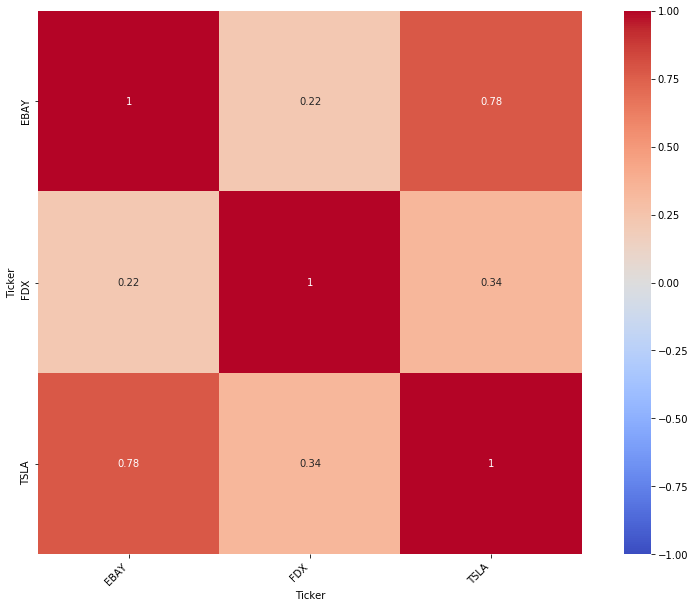

In [56]:
yo.plot_correlations()

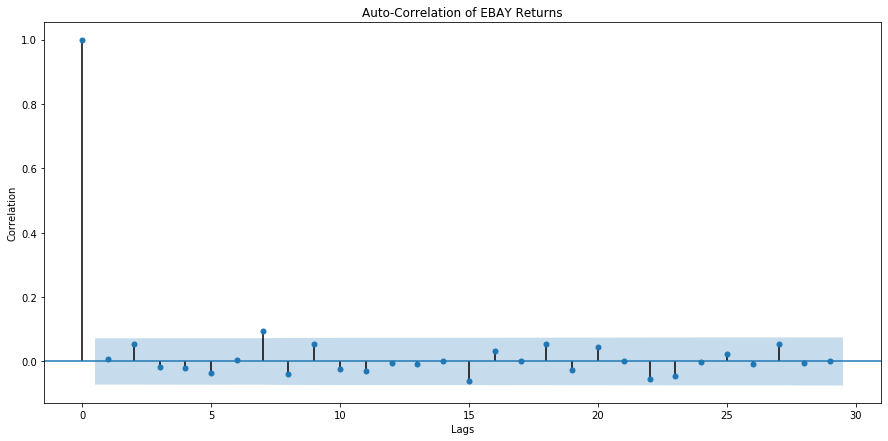

In [84]:
yo.plot_auto_correlations(ticker = 'EBAY')